In [1]:
#import sys
#sys.path.append(os.path.join'C:\Users\Dell\GitHub\biotuner\biotuner')
import numpy as np
import math
from fractions import Fraction
import itertools
import biotuner
from biotuner.biotuner_utils import *
from biotuner.biotuner_functions import *
import matplotlib.pyplot as plt
from numpy import array, zeros, ones, arange, log2, sqrt, diff, concatenate
import emd
from PyEMD import EMD, EEMD
from scipy.signal import butter, lfilter
import colorednoise as cn
from biotuner import *
import mne
from biotuner.biotuner2d import*
from biotuner.biotuner_object import *

pygame 2.0.2 (SDL 2.0.16, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Harmonic analysis of Gravitational Waves Strains

When discussing gravitational waves, the most common parameter describing the amplitude is a dimensionless "strain" h = 2∫∫ g' dt ². Strain data is measured with the interferometer.

We will compare H1 vs L1 detectors.

In [343]:
path='E:/Downloads-2To/'
fname='H-H1_LOSC_4_V1-815411200-4096.hdf5'
fname2 = 'L-L1_GWOSC_O2_4KHZ_R1-1187487744-4096.hdf5'
import h5py as h5
module_path = 'C:/Users/Dell/GitHub/biotuner/dev/'
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import readligo as rl
    
strain1, time1, channel_dict1 = rl.loaddata(path+fname)
ts1 = time[1] - time[0] #-- Time between samples
fs1 = int(1.0 / ts)          #-- Sampling frequency

strain2, time2, channel_dict2 = rl.loaddata(path+fname2)
ts2 = time[1] - time[0] #-- Time between samples
fs2 = int(1.0 / ts)          #-- Sampling frequency


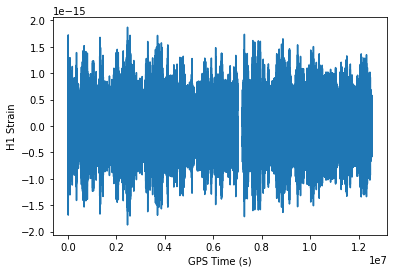

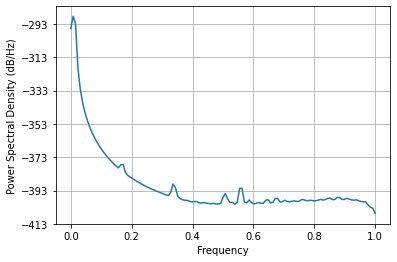

In [351]:
plt.plot(strain1)
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()
plt.psd(strain1[12000000:12500000])
plt.show()

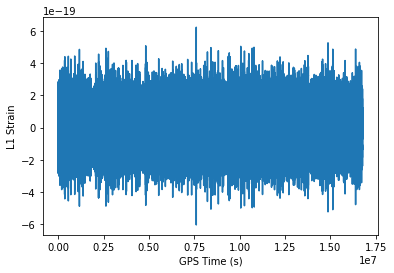

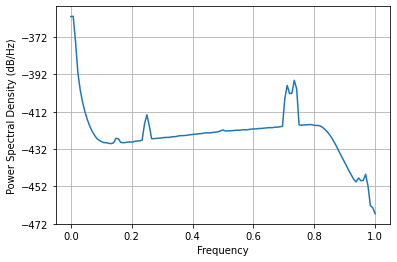

In [359]:
plt.plot(strain2)
plt.xlabel('GPS Time (s)')
plt.ylabel('L1 Strain')
plt.show()
plt.psd(strain2[12000000:12500000])
plt.show()

#### We will slice the data in chunks of 5 seconds to compare multiple instances of H1 and L1 gravitational waves data

In [363]:
gw_H1 = slice_data(strain1, 4096, window=5)
gw_L1 = slice_data(strain2, 4096, window=5)

C:\Users\Dell\Anaconda3\envs\biotuner\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
C:\Users\Dell\Anaconda3\envs\biotuner\lib\site-packages\biotuner\biotuner_functions.py:172: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  harm_fit = np.array(harm_temp).squeeze()


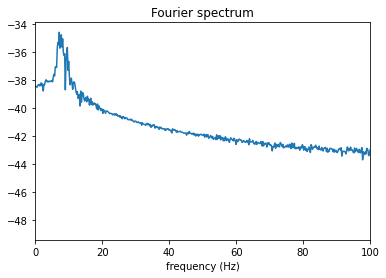

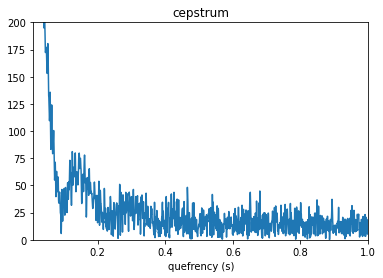

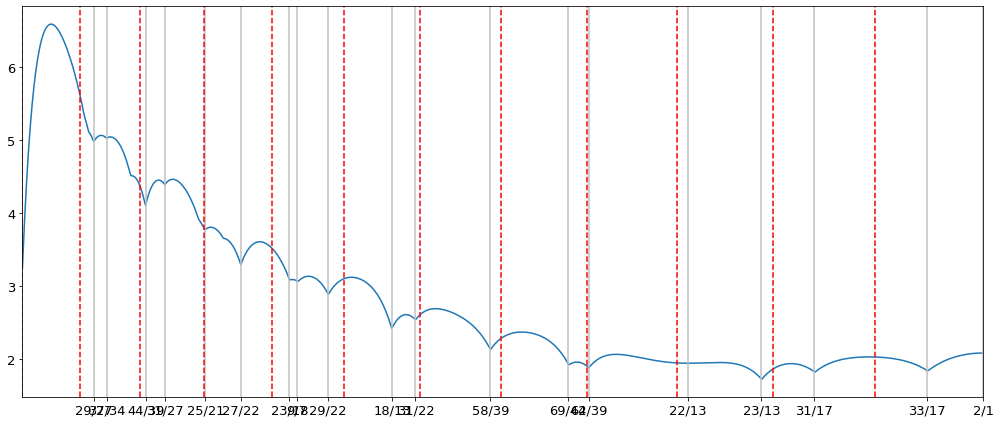

0.5536172389984131


In [388]:
import time
start = time.time()
data = gw_L1[101] # Define data (single time series)
biotuning = biotuner(4096, peaks_function = 'cepstrum', precision = 0.1, n_harm = 2,
                    ratios_n_harms = 5, ratios_inc_fit = False, ratios_inc = True, scale_cons_limit = 0.1) # Initialize biotuner object
biotuning.peaks_extraction(data, ratios_extension = True, max_freq = 100, nIMFs = 5, graph=True, n_peaks=10,  min_harms = 4,)
biotuning.compute_peaks_metrics()
#biotuning.peaks_extension(method = 'harmonic_fit', harm_function = 'mult', cons_limit = 0.1, 
#                          ratios_extension = True, harm_bounds = 0.5)
biotuning.compute_diss_curve(plot = True, input_type = 'peaks', euler_comp = False, denom = 50, max_ratio = 2, n_tet_grid = 12)
#biotuning.compute_spectromorph(comp_chords = True, method = 'SpectralCentroid', min_notes = 3, cons_limit = 0.5, cons_chord_method = 'cons', 
#                               window = 100, overlap = 1, graph = True)

#biotuning.compute_harmonic_entropy(input_type = 'extended_ratios_inc', plot_entropy = True, octave = 2, rebound = False, sub=False)
stop = time.time()
print(stop-start)

In [389]:
biotuning.peaks

array([25.64, 22.73, 18.52, 17.24, 14.49, 16.13,  7.46,  7.94,  6.17,
        6.71])

In [169]:
datacore = h5.File(path+'data-core.h5', 'r')

In [115]:
datacore.keys()

<KeysViewHDF5 ['energy', 'horizon', 'rh_22', 'rpsi4_22']>

In [125]:
datacore['rh_22']['Rh_l2_m2_r00550.txt'][()].shape

(30264, 9)

In [134]:
datacore['rh_22'].keys()

<KeysViewHDF5 ['Rh_l2_m2_r00550.txt', 'Rh_l2_m2_r00600.txt', 'Rh_l2_m2_r00650.txt', 'Rh_l2_m2_r00700.txt', 'Rh_l2_m2_r00800.txt', 'Rh_l2_m2_r00850.txt']>

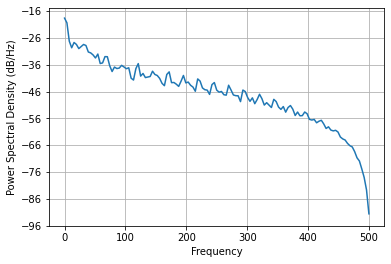

In [170]:
data_core = np.moveaxis(datacore['rh_22']['Rh_l2_m2_r00650.txt'][()], 0, 1)
plt.psd(data_core[5], Fs=1000)
plt.show()

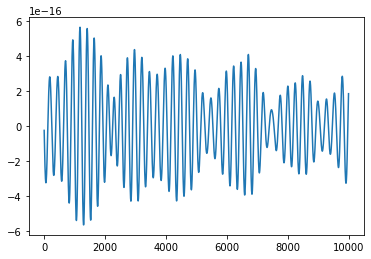

In [334]:
plt.plot(strain2[2000000:2010000])

C:\Users\Dell\Anaconda3\envs\biotuner\lib\site-packages\biotuner\biotuner_functions.py:1358: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  harmonics = np.array(harmonics)
C:\Users\Dell\Anaconda3\envs\biotuner\lib\site-packages\biotuner\biotuner_functions.py:1360: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  harmonic_peaks = np.array(harmonic_peaks)
C:\Users\Dell\Anaconda3\envs\biotuner\lib\site-packages\biotuner\biotuner_functions.py:172: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-o

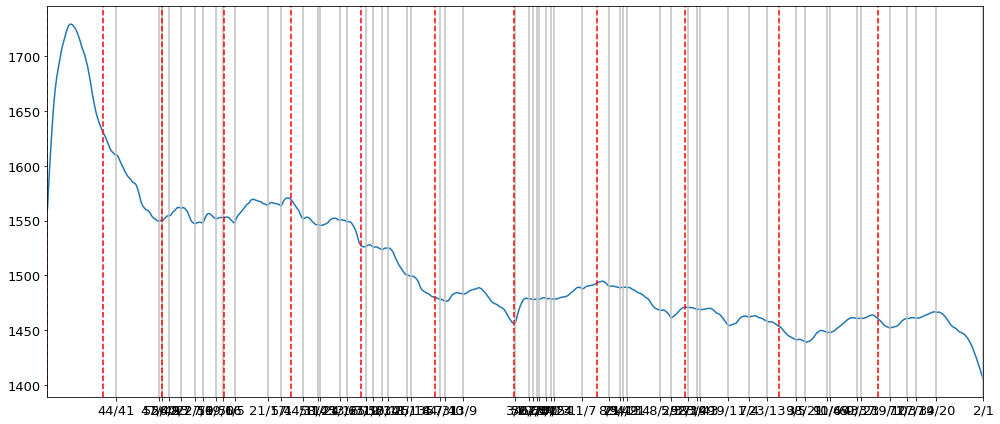

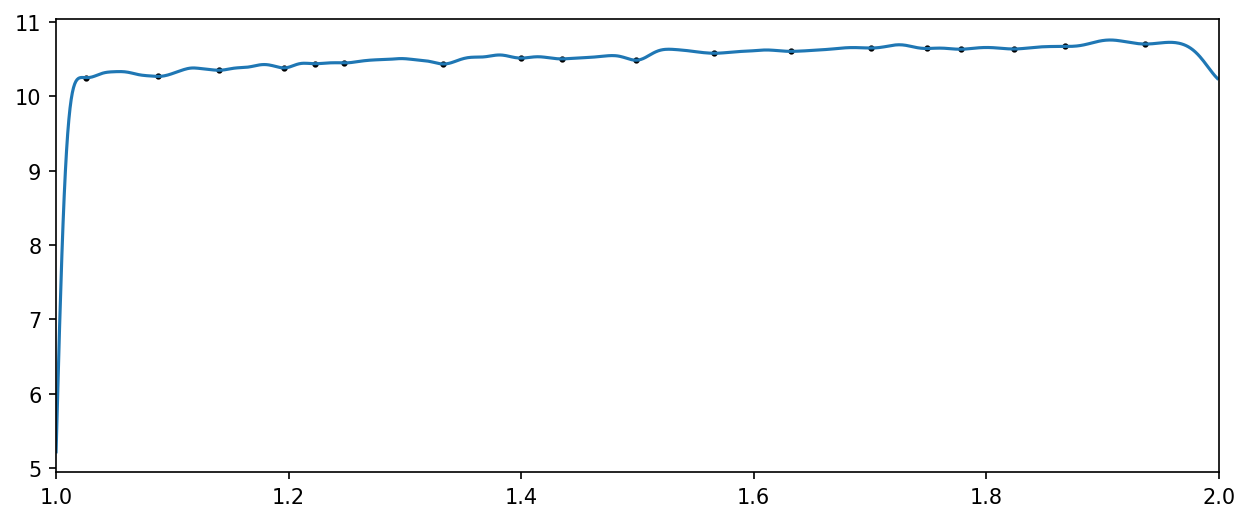

124.18019247055054


In [337]:
import time
start = time.time()
data = strain2[11800000:12000000] # Define data (single time series)
biotuning = biotuner(4096, peaks_function = 'harmonic_peaks', precision = 0.1, n_harm = 20,
                    ratios_n_harms = 5, ratios_inc_fit = False, ratios_inc = True, scale_cons_limit = 0.1) # Initialize biotuner object
biotuning.peaks_extraction(data, ratios_extension = True, max_freq = 500, nIMFs = 5, graph=True, n_peaks=5)
biotuning.compute_peaks_metrics()
biotuning.peaks_extension(method = 'harmonic_fit', harm_function = 'mult', cons_limit = 0.1, 
                          ratios_extension = True, harm_bounds = 0.5)
biotuning.compute_diss_curve(plot = True, input_type = 'extended_peaks', euler_comp = False, denom = 50, max_ratio = 2, n_tet_grid = 12)
#biotuning.compute_spectromorph(comp_chords = True, method = 'SpectralCentroid', min_notes = 3, cons_limit = 0.5, cons_chord_method = 'cons', 
#                               window = 100, overlap = 1, graph = True)

biotuning.compute_harmonic_entropy(input_type = 'extended_ratios_inc', plot_entropy = True, octave = 2, rebound = False, sub=False)
stop = time.time()
print(stop-start)

In [338]:
biotuning.peaks

array([  1.2,   2.2,   3.7,   6.2,   8.5,  10.7,  12. ,  13.2,  14.4,
        16.3,  18.6,  21.5,  23.7,  25. ,  26.7,  27.7,  29.5,  31.1,
        51. ,  56.3,  58.7,  60. ,  67.4,  70.8,  71.9,  76.8,  79.2,
        80.2,  88.5,  92.5,  94.9, 105. , 106.2, 108.9, 118.5, 120. ,
       127. , 132. , 142. , 157.2, 168.1, 169.9, 171.1, 173.8, 180. ,
       182.3, 183.4, 210. , 212.8, 217.8, 222. , 229.2, 240. , 248. ,
       259.2, 272.4, 273.6, 283.2, 294.8, 300. , 301.3, 332.4, 337. ,
       350. , 358.6, 360. , 391.2, 421.2, 457.5, 458.8, 481.2])

## GW

In [202]:
datacore2 = h5.File(path+'data-core2.h5', 'r')
datacore2.keys()


<KeysViewHDF5 ['energy', 'rh_22', 'rpsi4_22']>

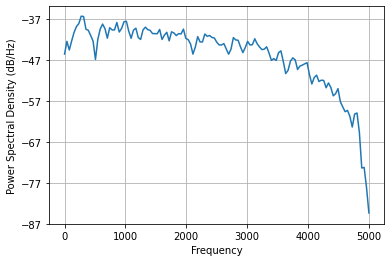

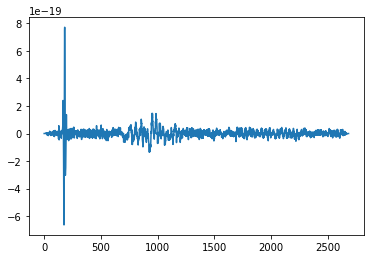

In [193]:
datacore['rh_22'].keys()
data_core2 = np.moveaxis(datacore2['rh_22']['Rh_l3_m0_r00400.txt'][()], 0, 1)
plt.psd(data_core2[5], Fs=10000)
plt.show()
plt.plot(data_core2[3])
plt.show()

In [204]:
datacore2['rpsi4_22'].keys()

<KeysViewHDF5 ['Rpsi4_l0_m0_r00400.txt', 'Rpsi4_l1_m0_r00400.txt', 'Rpsi4_l1_m1_r00400.txt', 'Rpsi4_l2_m0_r00400.txt', 'Rpsi4_l2_m1_r00400.txt', 'Rpsi4_l2_m2_r00400.txt', 'Rpsi4_l3_m0_r00400.txt', 'Rpsi4_l3_m1_r00400.txt', 'Rpsi4_l3_m2_r00400.txt', 'Rpsi4_l3_m3_r00400.txt', 'Rpsi4_l4_m0_r00400.txt', 'Rpsi4_l4_m1_r00400.txt', 'Rpsi4_l4_m2_r00400.txt', 'Rpsi4_l4_m3_r00400.txt', 'Rpsi4_l4_m4_r00400.txt']>

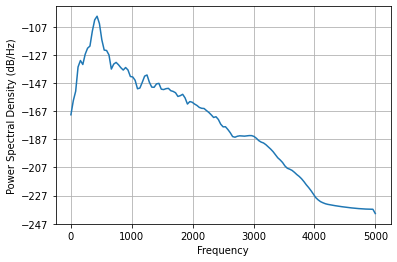

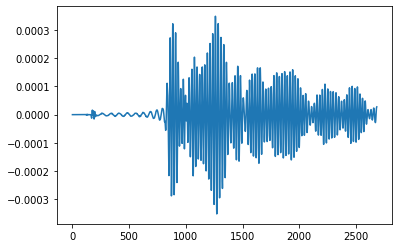

In [283]:

data_psi4 = np.moveaxis(datacore2['rpsi4_22']['Rpsi4_l3_m3_r00400.txt'][()], 0, 1)
plt.psd(data_psi4[2], Fs=10000)
plt.show()
plt.plot(data_psi4[2])
plt.show()

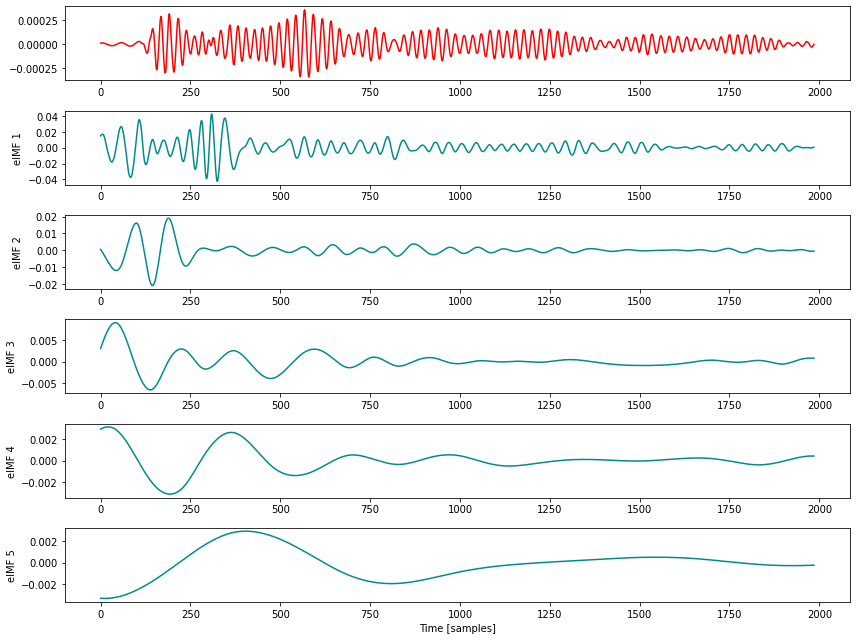

C:\Users\Dell\Anaconda3\envs\biotuner\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 163840 is greater than input length  = 1985, using nperseg = 1985
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dell\Anaconda3\envs\biotuner\lib\site-packages\biotuner\biotuner_functions.py:172: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  harm_fit = np.array(harm_temp).squeeze()


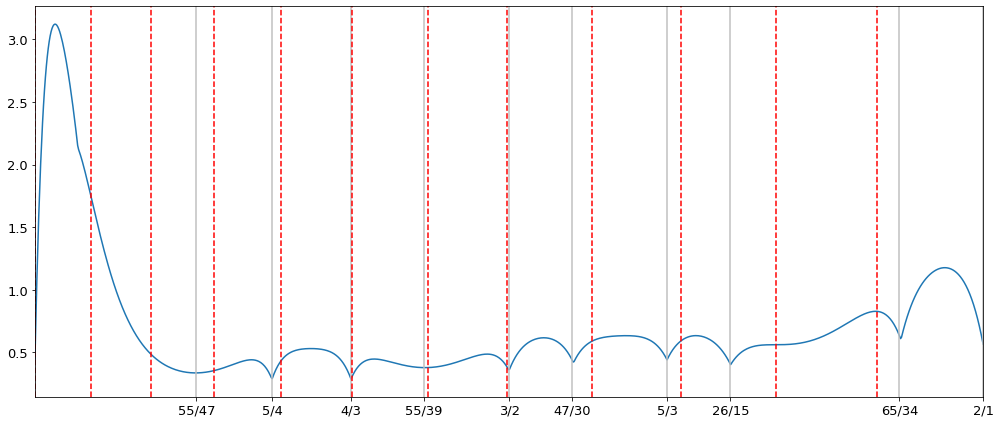

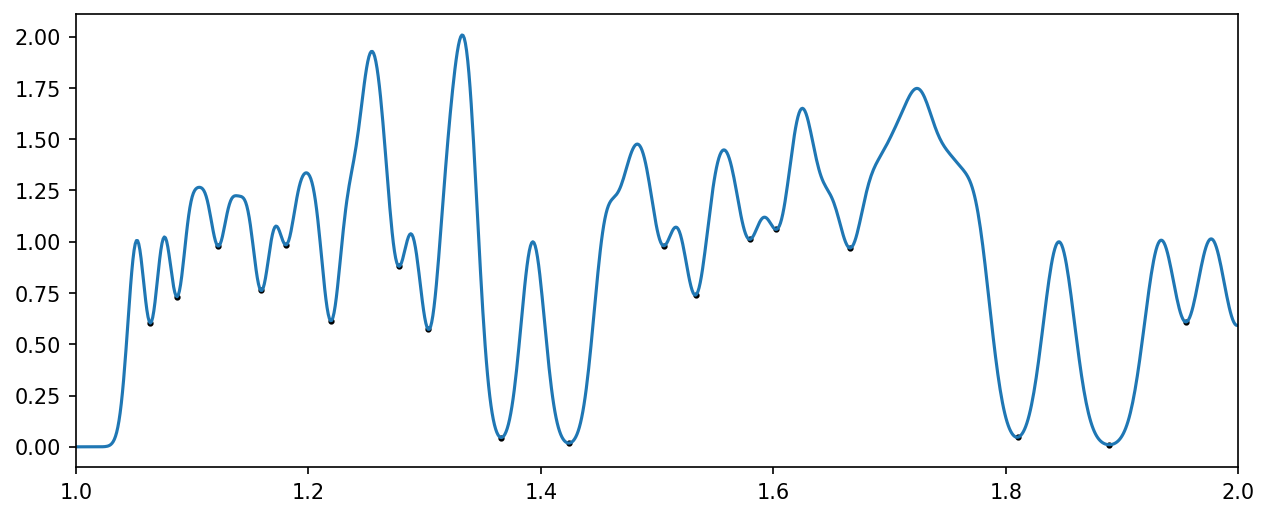

1.3636903762817383


In [285]:
import time
start = time.time()
data = data_psi4[1][700:20000] # Define data (single time series)
biotuning = biotuner(16384, peaks_function = 'EEMD', precision = 0.1, n_harm = 20,
                    ratios_n_harms = 5, ratios_inc_fit = False, ratios_inc = True, scale_cons_limit = 0.1) # Initialize biotuner object
biotuning.peaks_extraction(data, ratios_extension = True, max_freq = 50, nIMFs = 5, graph=True, n_peaks=5)
biotuning.compute_peaks_metrics()
biotuning.peaks_extension(method = 'harmonic_fit', harm_function = 'mult', cons_limit = 0.1, 
                          ratios_extension = True, harm_bounds = 0.5)
biotuning.compute_diss_curve(plot = True, input_type = 'extended_peaks', euler_comp = False, denom = 50, max_ratio = 2, n_tet_grid = 12)
#biotuning.compute_spectromorph(comp_chords = True, method = 'SpectralCentroid', min_notes = 3, cons_limit = 0.5, cons_chord_method = 'cons', 
#                               window = 100, overlap = 1, graph = True)

biotuning.compute_harmonic_entropy(input_type = 'extended_ratios_inc', plot_entropy = True, octave = 2, rebound = False, sub=False)
stop = time.time()
print(stop-start)

In [286]:
biotuning.peaks_metrics

{'cons': 0.004801532457024955,
 'euler': 298,
 'tenney': 14.703277131916247,
 'harm_fit': 6,
 'harmsim': 12.84375529784515,
 'harm_pos': [1, 2, 3, 4, 5, 8, 12, 16, 17, 20],
 'common_harm_pos': [5, 4]}

In [234]:
datacore3 = h5.File(path+'data-core3.h5', 'r')
datacore3.keys()
datacore3['rh_22'].keys()

<KeysViewHDF5 ['Rh_l2_m2_r00700.txt', 'Rh_l2_m2_r00750.txt', 'Rh_l2_m2_r00800.txt', 'Rh_l2_m2_r00850.txt', 'Rh_l2_m2_r00900.txt']>

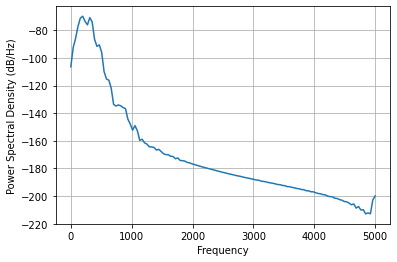

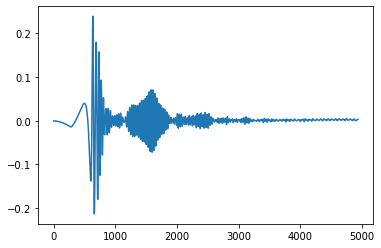

In [243]:
datacore['rh_22'].keys()
data_core3 = np.moveaxis(datacore3['rh_22']['Rh_l2_m2_r00850.txt'][()], 0, 1)
plt.psd(data_core3[3], Fs=10000)
plt.show()
plt.plot(data_core3[2])
plt.show()

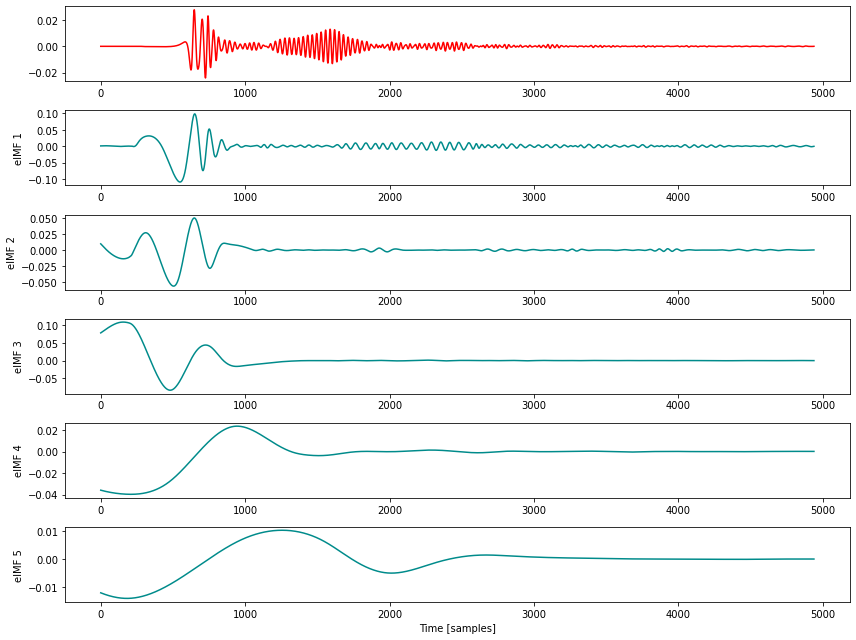

C:\Users\Dell\Anaconda3\envs\biotuner\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 100000 is greater than input length  = 4939, using nperseg = 4939
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dell\Anaconda3\envs\biotuner\lib\site-packages\biotuner\biotuner_functions.py:172: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  harm_fit = np.array(harm_temp).squeeze()


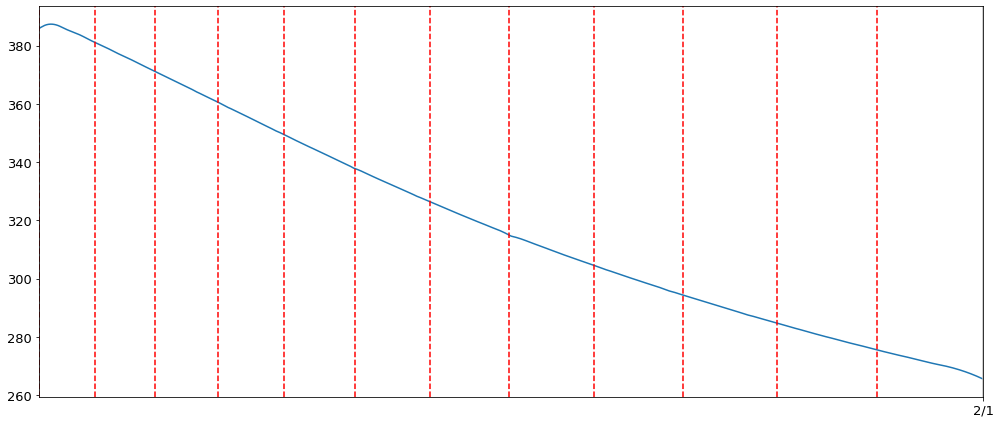

C:\Users\Dell\Anaconda3\envs\biotuner\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Dell\Anaconda3\envs\biotuner\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


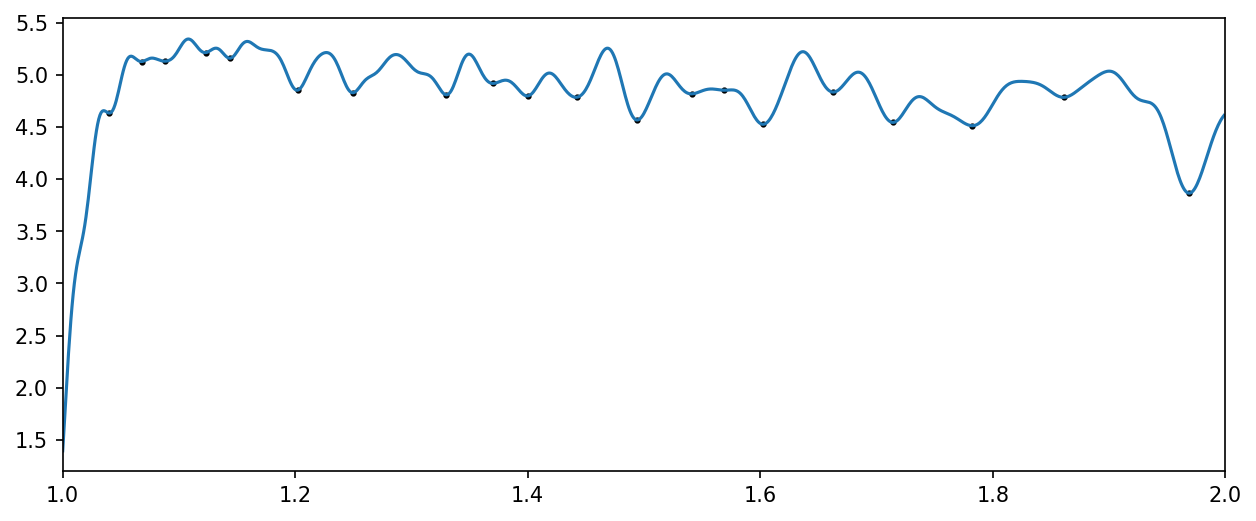

1.6801578998565674


In [244]:
import time
start = time.time()
data = data_core3[4] # Define data (single time series)
biotuning = biotuner(10000, peaks_function = 'EEMD', precision = 0.1, n_harm = 20,
                    ratios_n_harms = 5, ratios_inc_fit = False, ratios_inc = True, scale_cons_limit = 0.1) # Initialize biotuner object
biotuning.peaks_extraction(data, ratios_extension = True, max_freq = 50, nIMFs = 5, graph=True, n_peaks=5)
biotuning.compute_peaks_metrics()
biotuning.peaks_extension(method = 'harmonic_fit', harm_function = 'mult', cons_limit = 0.1, 
                          ratios_extension = True, harm_bounds = 0.5)
biotuning.compute_diss_curve(plot = True, input_type = 'extended_peaks', euler_comp = False, denom = 50, max_ratio = 2, n_tet_grid = 12)
#biotuning.compute_spectromorph(comp_chords = True, method = 'SpectralCentroid', min_notes = 3, cons_limit = 0.5, cons_chord_method = 'cons', 
#                               window = 100, overlap = 1, graph = True)

biotuning.compute_harmonic_entropy(input_type = 'extended_ratios_inc', plot_entropy = True, octave = 2, rebound = False, sub=False)
stop = time.time()
print(stop-start)

In [257]:
biotuning.peaks

array([5.900e+00, 1.000e-01, 1.000e-01, 3.520e+01, 1.558e+02])